# 📊 Metriche di Valutazione: Top-10 Prediction (output/geolife/top10_wot)

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import logging
import ast
from sklearn.metrics import f1_score


In [23]:
# Configurazione logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Funzione per convertire una stringa di lista in lista vera
def parse_prediction(pred_str):
    try:
        return ast.literal_eval(pred_str)
    except Exception as e:
        logging.warning(f"Parsing fallito per predizione: {pred_str} con errore: {e}")
        return []

# Funzione per calcolare hit@k
def calculate_hit_at_k(row, k=10):
    pred_list = row['prediction']
    return int(row['ground_truth']) in pred_list[:k] if isinstance(pred_list, list) else False

# 📁 Percorso dei risultati
output_dir = 'output/geolife/top10_wot'

# 📄 Lista dei file
file_list = [file for file in os.listdir(output_dir) if file.endswith('.csv')]
file_path_list = [os.path.join(output_dir, file) for file in file_list]

# 🧾 Inizializza DataFrame
df = pd.DataFrame(columns=['user_id', 'ground_truth', 'prediction', 'reason'])

# 🔄 Carica tutti i file
for file_path in file_path_list:
    logging.debug(f"🗂️ Tentativo di lettura del file: {file_path}")
    try:
        iter_df = pd.read_csv(file_path)
        logging.debug(f"✅ File letto con successo: {file_path}")
        df = pd.concat([df, iter_df], ignore_index=True)
    except Exception as e:
        logging.error(f"❌ Errore nella lettura del file {file_path}: {e}")

# 🧹 Parsing e pulizia dati
df['prediction'] = df['prediction'].apply(parse_prediction)
df['ground_truth'] = df['ground_truth'].astype(int)

# 🎯 Calcola hit@10
df['hit@10'] = df.apply(lambda row: calculate_hit_at_k(row, k=10), axis=1)

# 🎯 Calcola metrica Acc@10
acc_at_10 = df['hit@10'].mean()

# 🧠 Predizione principale: primo elemento di ogni lista
majority_preds = [row[0] if isinstance(row, list) and row else -1 for row in df['prediction']]
f1 = f1_score(df['ground_truth'], majority_preds, average='macro')

# 📊 Risultati
print("✅ Acc@10:", round(acc_at_10, 4))
print("✅ F1 Score:", round(f1, 4))


2025-04-09 21:12:47,880 - DEBUG - 🗂️ Tentativo di lettura del file: output/geolife/top10_wot/40.csv
2025-04-09 21:12:47,888 - DEBUG - ✅ File letto con successo: output/geolife/top10_wot/40.csv
2025-04-09 21:12:47,891 - DEBUG - 🗂️ Tentativo di lettura del file: output/geolife/top10_wot/41.csv
2025-04-09 21:12:47,893 - DEBUG - ✅ File letto con successo: output/geolife/top10_wot/41.csv
2025-04-09 21:12:47,894 - DEBUG - 🗂️ Tentativo di lettura del file: output/geolife/top10_wot/43.csv
2025-04-09 21:12:47,897 - DEBUG - ✅ File letto con successo: output/geolife/top10_wot/43.csv
2025-04-09 21:12:47,897 - DEBUG - 🗂️ Tentativo di lettura del file: output/geolife/top10_wot/42.csv
2025-04-09 21:12:47,902 - DEBUG - ✅ File letto con successo: output/geolife/top10_wot/42.csv
2025-04-09 21:12:47,902 - DEBUG - 🗂️ Tentativo di lettura del file: output/geolife/top10_wot/45.csv
2025-04-09 21:12:47,905 - DEBUG - ✅ File letto con successo: output/geolife/top10_wot/45.csv
2025-04-09 21:12:47,906 - DEBUG - 🗂

ValueError: Mix of label input types (string and number)

In [ ]:
# Carica tutti i CSV da output/geolife/top10_wot
output_dir = '/Users/simo/Desktop/LLM-Mob-As-Mobility-Interpreter/output/geolife/top10_wot'

file_list = [file for file in os.listdir(output_dir) if file.endswith('.csv')]
file_path_list = [os.path.join(output_dir, file) for file in file_list]

# Unisci in un unico dataframe
df = pd.DataFrame(columns=['user_id', 'ground_truth', 'prediction', 'reason'])
for file_path in file_path_list:
    iter_df = pd.read_csv(file_path)
    df = pd.concat([df, iter_df], ignore_index=True)

df['prediction'] = df['prediction'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['ground_truth'] = df['ground_truth'].astype(int)
df.head()




,user_id,ground_truth,prediction,reason
0,40,1,"[1, 1147, 1006, 976, 1003, 960, 960, 960, 960,...",The prediction is based on the user's recent s...
1,40,1006,"[1147, 1006, 1, 976, 1003, 960, 1147, 1147, 11...",The user has a strong preference for staying a...
2,40,1147,"[1147, 1006, 1, 976, 1003, 960, 1140, 1142, 10...",The user's recent activity pattern shows a str...
3,40,1147,"[1147, 1006, 1, 976, 1003, 960, 960, 1147, 100...",The user's recent activities and historical st...
4,40,1006,"[1147, 1006, 1, 976, 1003, 960, 960, 1147, 1, ...",Based on the user's activity pattern and recen...


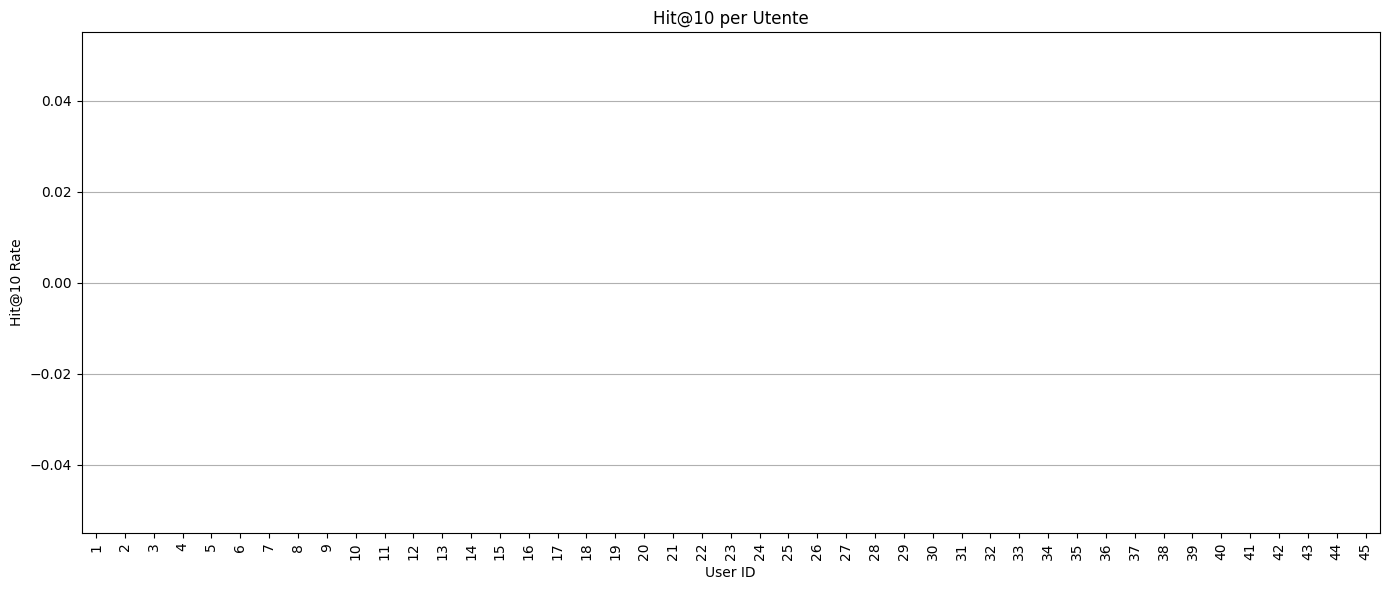

In [ ]:
# 📈 Visualizza grafici
plt.figure(figsize=(8, 4))
plt.bar(['Acc@10', 'F1 Score'], [acc_at_10, f1], color=['skyblue', 'lightcoral'])
plt.title('📊 Metriche di valutazione Top-10')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()